In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Generate random numerical data (100 values)
data = np.random.normal(loc=50, scale=15, size=100)  # Mean=50, Std Dev=15

In [5]:
# Convert to DataFrame
df = pd.DataFrame(data, columns=["Values"])

In [6]:
# Descriptive Statistics
summary_stats = df.describe()
summary_stats.loc['variance'] = df.var()  # Add variance
summary_stats.loc['mode'] = df.mode().iloc[0]  # Add mode

print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
              Values
count     100.000000
mean       48.442302
std        13.622526
min        10.703823
25%        40.986415
50%        48.095656
75%        56.089281
max        77.784173
variance  185.573226
mode       10.703823


In [11]:
# Detecting Outliers using IQR
Q1 = df["Values"].quantile(0.25)
Q3 = df["Values"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df["Values"] < lower_bound) | (df["Values"] > upper_bound)]
print("\n Detected Outliers:")
print(outliers)


 Detected Outliers:
       Values
74  10.703823


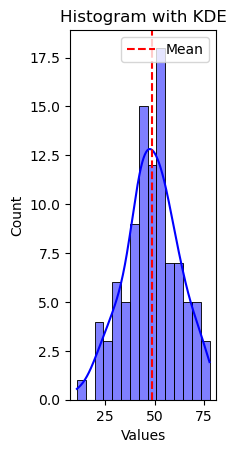

In [8]:
# Histogram
plt.subplot(1, 3, 1)
sns.histplot(df["Values"], bins=15, kde=True, color="blue")
plt.axvline(df["Values"].mean(), color="red", linestyle="dashed", label="Mean")
plt.title("Histogram with KDE")
plt.legend()

Text(0.5, 1.0, 'Boxplot (Detects Outliers)')

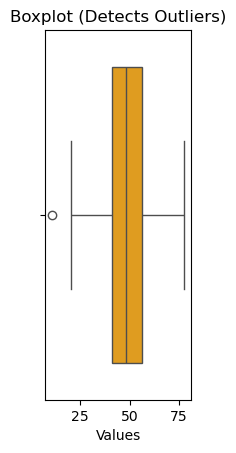

In [9]:
# Boxplot
plt.subplot(1, 3, 2)
sns.boxplot(x=df["Values"], color="orange")
plt.title("Boxplot (Detects Outliers)")

C:\Users\sandh\AppData\Local\Temp\ipykernel_352\2784938801.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Values"], shade=True, color="green")


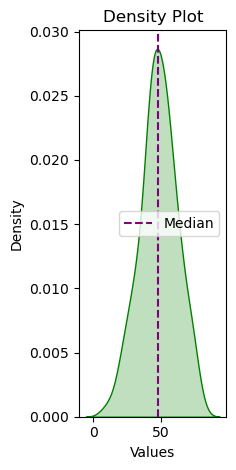

In [10]:
# Density Plot
plt.subplot(1, 3, 3)
sns.kdeplot(df["Values"], shade=True, color="green")
plt.axvline(df["Values"].median(), color="purple", linestyle="dashed", label="Median")
plt.title("Density Plot")
plt.legend()

plt.tight_layout()
plt.show()